In [21]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [22]:
#define state
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

In [23]:
def calc_bmi(state: BMIState) -> BMIState:
    
    weight = state['weight']
    height = state['height']
    
    bmi = weight/(height**2)
    state['bmi'] = round(bmi,2)
    
    return state
    


In [24]:
def label_bmi(state: BMIState) -> BMIState:
    
    label = state['bmi']
    if label < 18:
        state['category'] = 'UNDERWEIGHT'
    elif 18 <= label < 25:
        state['category'] = 'NORMAL'
    elif 25 <= label < 30:
        state['category'] = 'OVERWEIGHT'
    else:
        state['category'] = 'OBESE'
        
    return state
    

In [26]:
#define Graph
graph = StateGraph(BMIState)

#add nodes
graph.add_node('bmi_calculator',calc_bmi)
graph.add_node('bmi_category', label_bmi)
#add egdes
graph.add_edge(START,'bmi_calculator')
graph.add_edge('bmi_calculator','bmi_category')
graph.add_edge('bmi_category',END)
#compile the graph

workflow = graph.compile()

#execute thr graph


In [27]:
initial_state = {'weight':80,'height':1.76}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight': 80, 'height': 1.76, 'bmi': 25.83, 'category': 'OVERWEIGHT'}


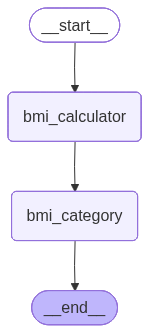

In [28]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())